In [35]:
import mne 
import os 
import matplotlib.pyplot as plt
import numpy as np

In [36]:
healthy_files = [f'Data/h{i:02}.edf' for i in range(1,15)]
schizophrenic_files = [f'Data/s{i:02}.edf' for i in range(1,15)]

def load_eeg_data(file_paths):
    raw_data = []
    for file in file_paths:
        raw = mne.io.read_raw_edf(file,preload=True)
        raw_data.append(raw)
    return raw_data

In [37]:
healthy_eeg_data = load_eeg_data(healthy_files)
schizophrenic_eeg_data = load_eeg_data(schizophrenic_files)

Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h05.edf...
EDF file detected
Se

In [38]:
print(len(healthy_eeg_data))
print(len(schizophrenic_eeg_data))

14
14


In [39]:
def plot_eeg_subplots(healthy_data, schizophrenic_data):
    healthy_plot = healthy_data.plot(duration=10, n_channels=10, show=False,title='Healthy EEG Data')
    healthy_plot.subplots_adjust(top=0.9)
    healthy_plot.set_size_inches(20, 10)
    schizophrenic_plot = schizophrenic_data.plot(
        duration=10, n_channels=10, show=False)
    schizophrenic_plot.subplots_adjust(top=0.9)
    schizophrenic_plot.set_size_inches(20, 10)
    plt.show();

In [40]:
healthy_eeg_data[0]

<RawEDF | h01.edf, 19 x 231250 (925.0 s), ~33.5 MB, data loaded>

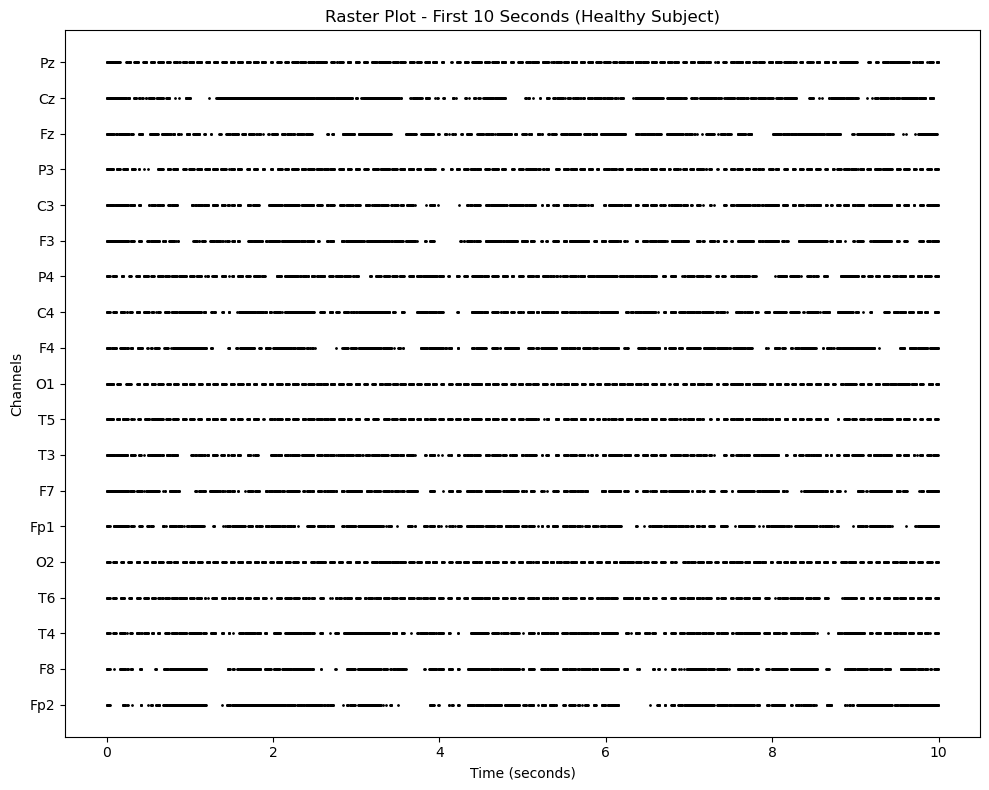

In [41]:
from Utils.Plot_utils import plot_raster

eeg_data = healthy_eeg_data[0].get_data()  
sfreq = healthy_eeg_data[0].info['sfreq']  

time_window = 10  
n_samples = int(time_window * sfreq)
eeg_data_first_10s = eeg_data[:, :n_samples]
time_first_10s = np.arange(0, n_samples) / sfreq  

plot_raster(eeg_data_first_10s, time_first_10s, title='Raster Plot - First 10 Seconds (Healthy Subject)',
            ch_names=healthy_eeg_data[0].info['ch_names'])

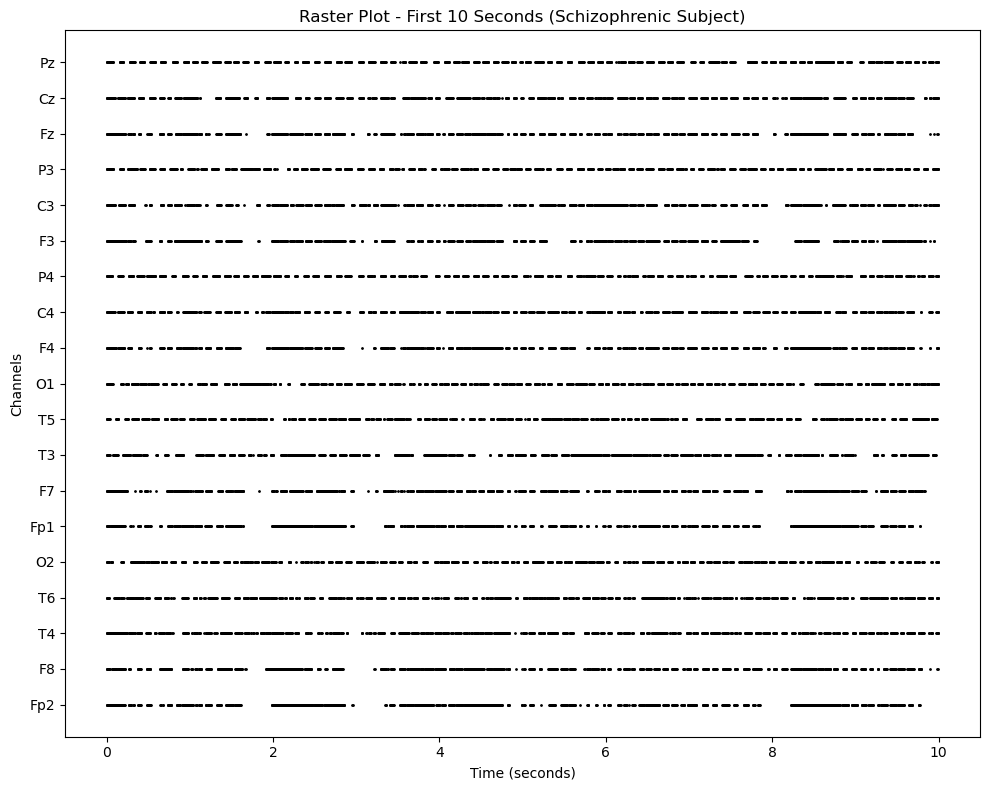

In [42]:
eeg_data = schizophrenic_eeg_data[0].get_data()  
sfreq = schizophrenic_eeg_data[0].info['sfreq']  
time_window = 10  
n_samples = int(time_window * sfreq)
eeg_data_first_10s = eeg_data[:, :n_samples]
time_first_10s = np.arange(0, n_samples) / sfreq  
plot_raster(eeg_data_first_10s, time_first_10s, title='Raster Plot - First 10 Seconds (Schizophrenic Subject)',
            ch_names=schizophrenic_eeg_data[0].info['ch_names'])

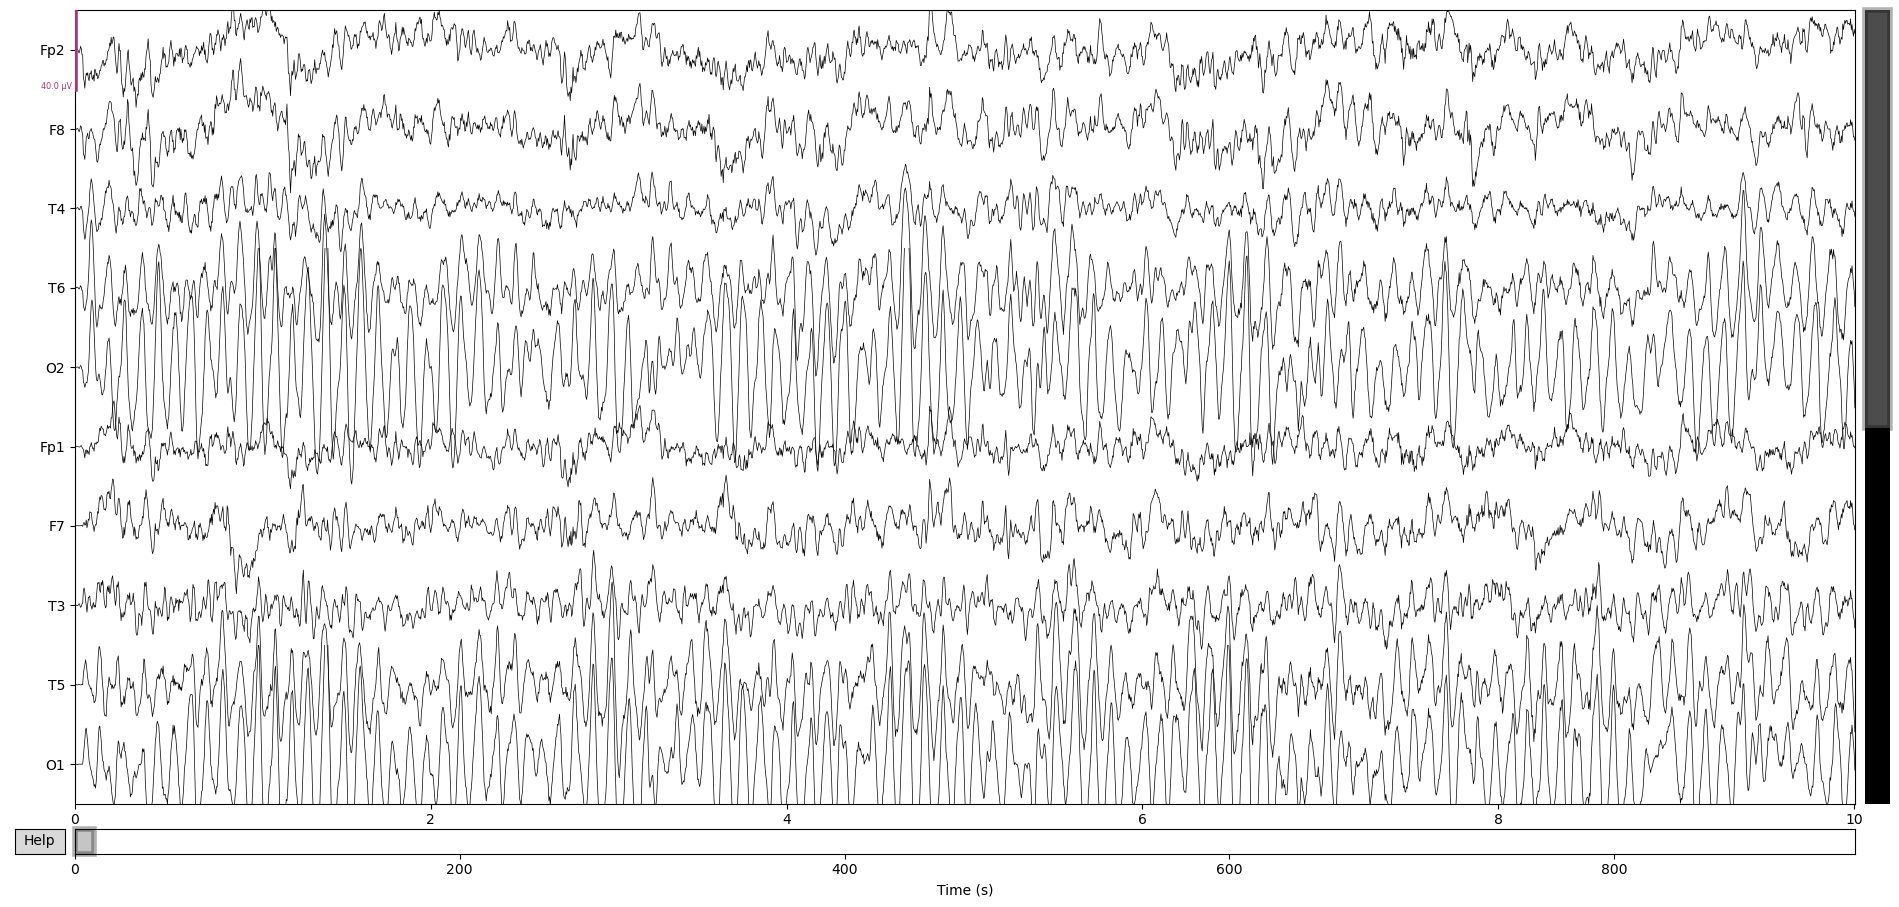

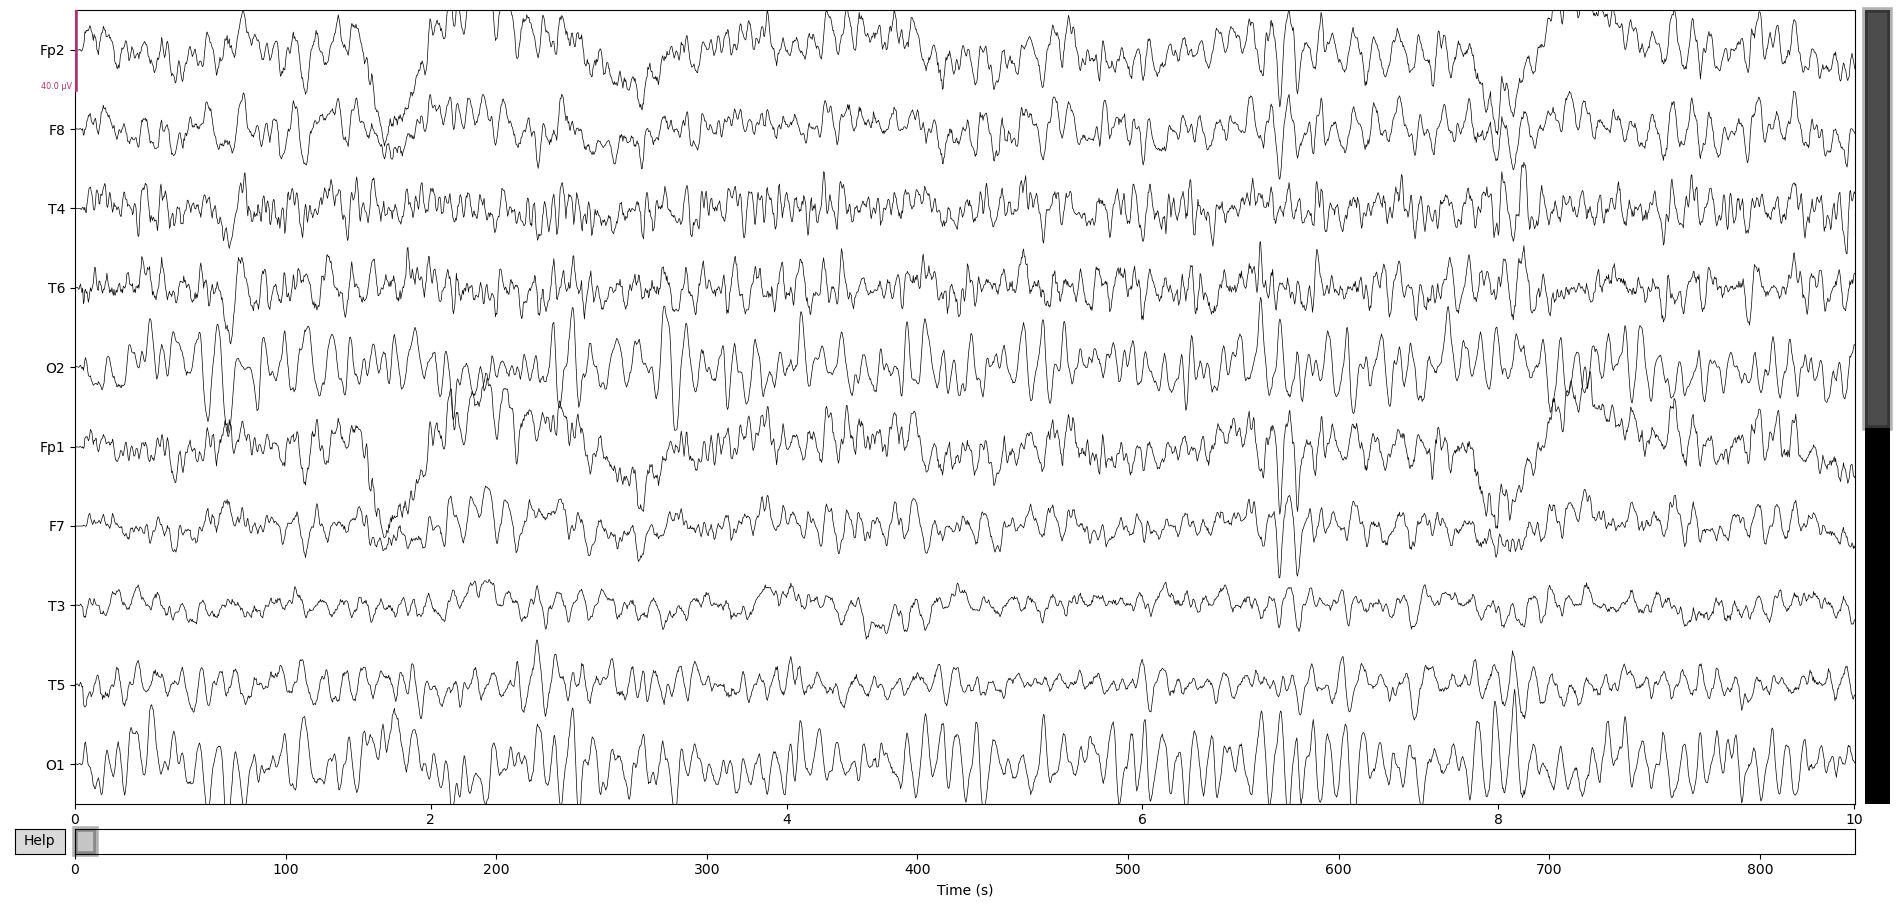

In [43]:
plot_eeg_subplots(healthy_eeg_data[0], schizophrenic_eeg_data[0])

In [44]:
def print_basic_info(raw_data, label):
    for idx, raw in enumerate(raw_data):
        print(f"\n{label} Subject {idx+1}:")
        print(raw.info)


print_basic_info(healthy_eeg_data, "Healthy")
print_basic_info(schizophrenic_eeg_data, "Schizophrenic")


Healthy Subject 1:
<Info | 8 non-empty values
 bads: []
 ch_names: Fp2, F8, T4, T6, O2, Fp1, F7, T3, T5, O1, F4, C4, P4, F3, C3, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2003-06-23 16:14:37 UTC
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
 subject_info: 1 item (dict)
>

Healthy Subject 2:
<Info | 8 non-empty values
 bads: []
 ch_names: Fp2, F8, T4, T6, O2, Fp1, F7, T3, T5, O1, F4, C4, P4, F3, C3, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2003-07-02 17:25:19 UTC
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
 subject_info: 1 item (dict)
>

Healthy Subject 3:
<Info | 8 non-empty values
 bads: []
 ch_names: Fp2, F8, T4, T6, O2, Fp1, F7, T3, T5, O1, F4, C4, P4, F3, C3, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2003-07-02 17:56:36 UTC
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
 subject_info: 1 item (dict)
>

Healthy Subject 4:
<Info | 8 non-empty values
 b

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)
C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)
C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)


Effective window size : 8.192 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)
C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)


Effective window size : 8.192 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)
C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)


Effective window size : 8.192 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)
C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)


Effective window size : 8.192 (s)


C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)


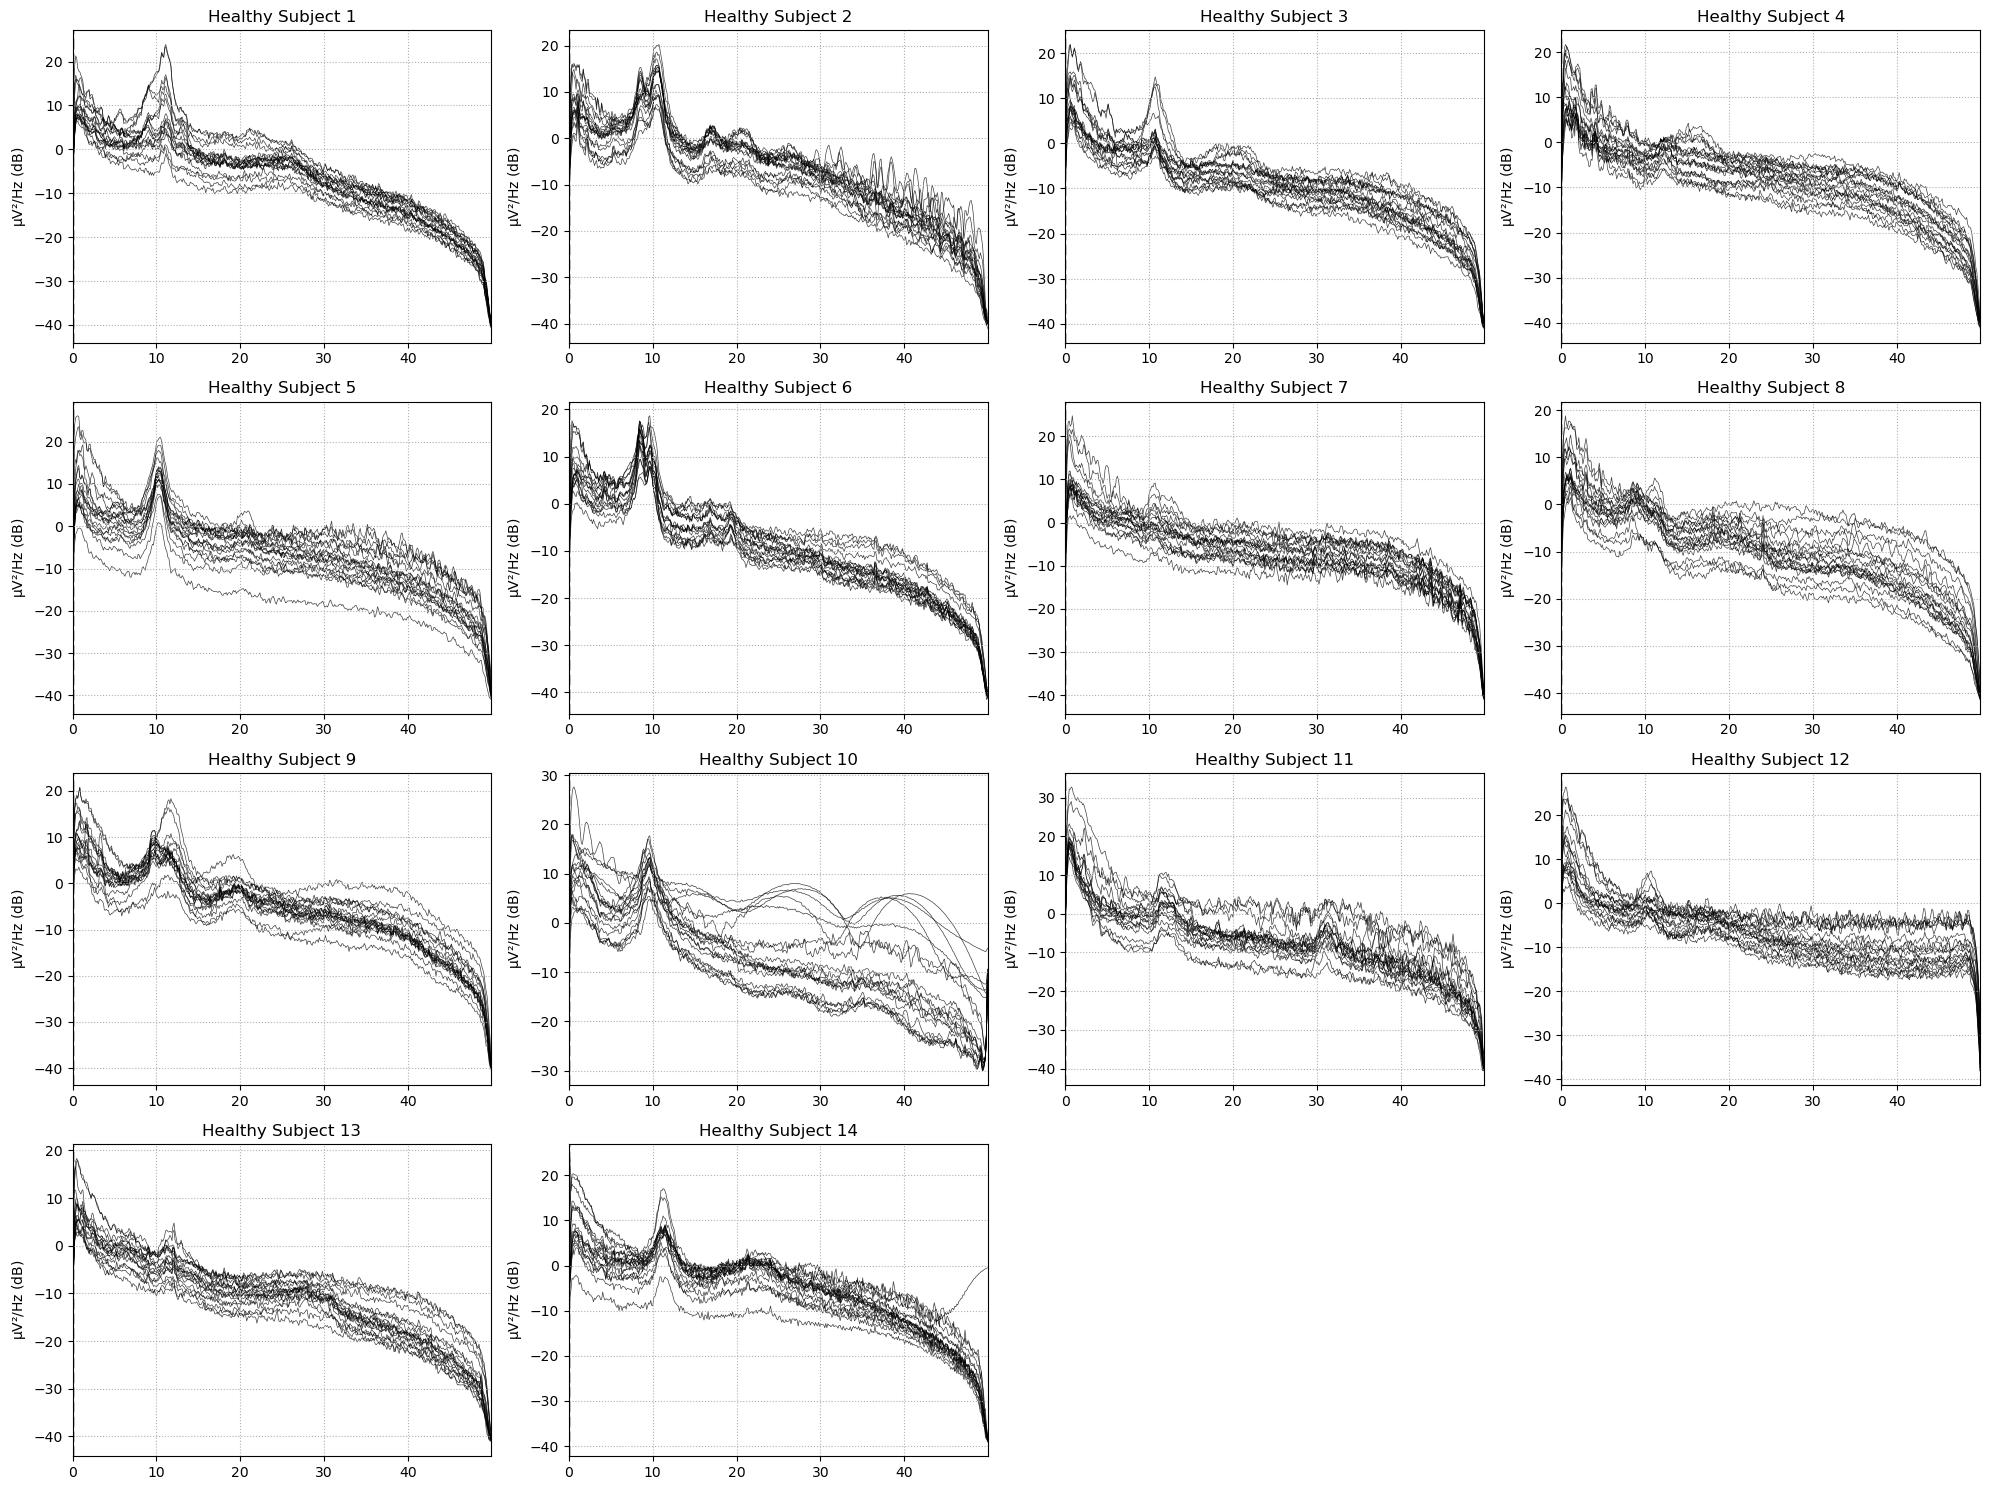

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)
C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)
C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)


Effective window size : 8.192 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)
C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)
C:\Users\anisr\AppData\Local\Temp\ipykernel_16136\3309800840.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=50, ax=axes[idx], show=False)


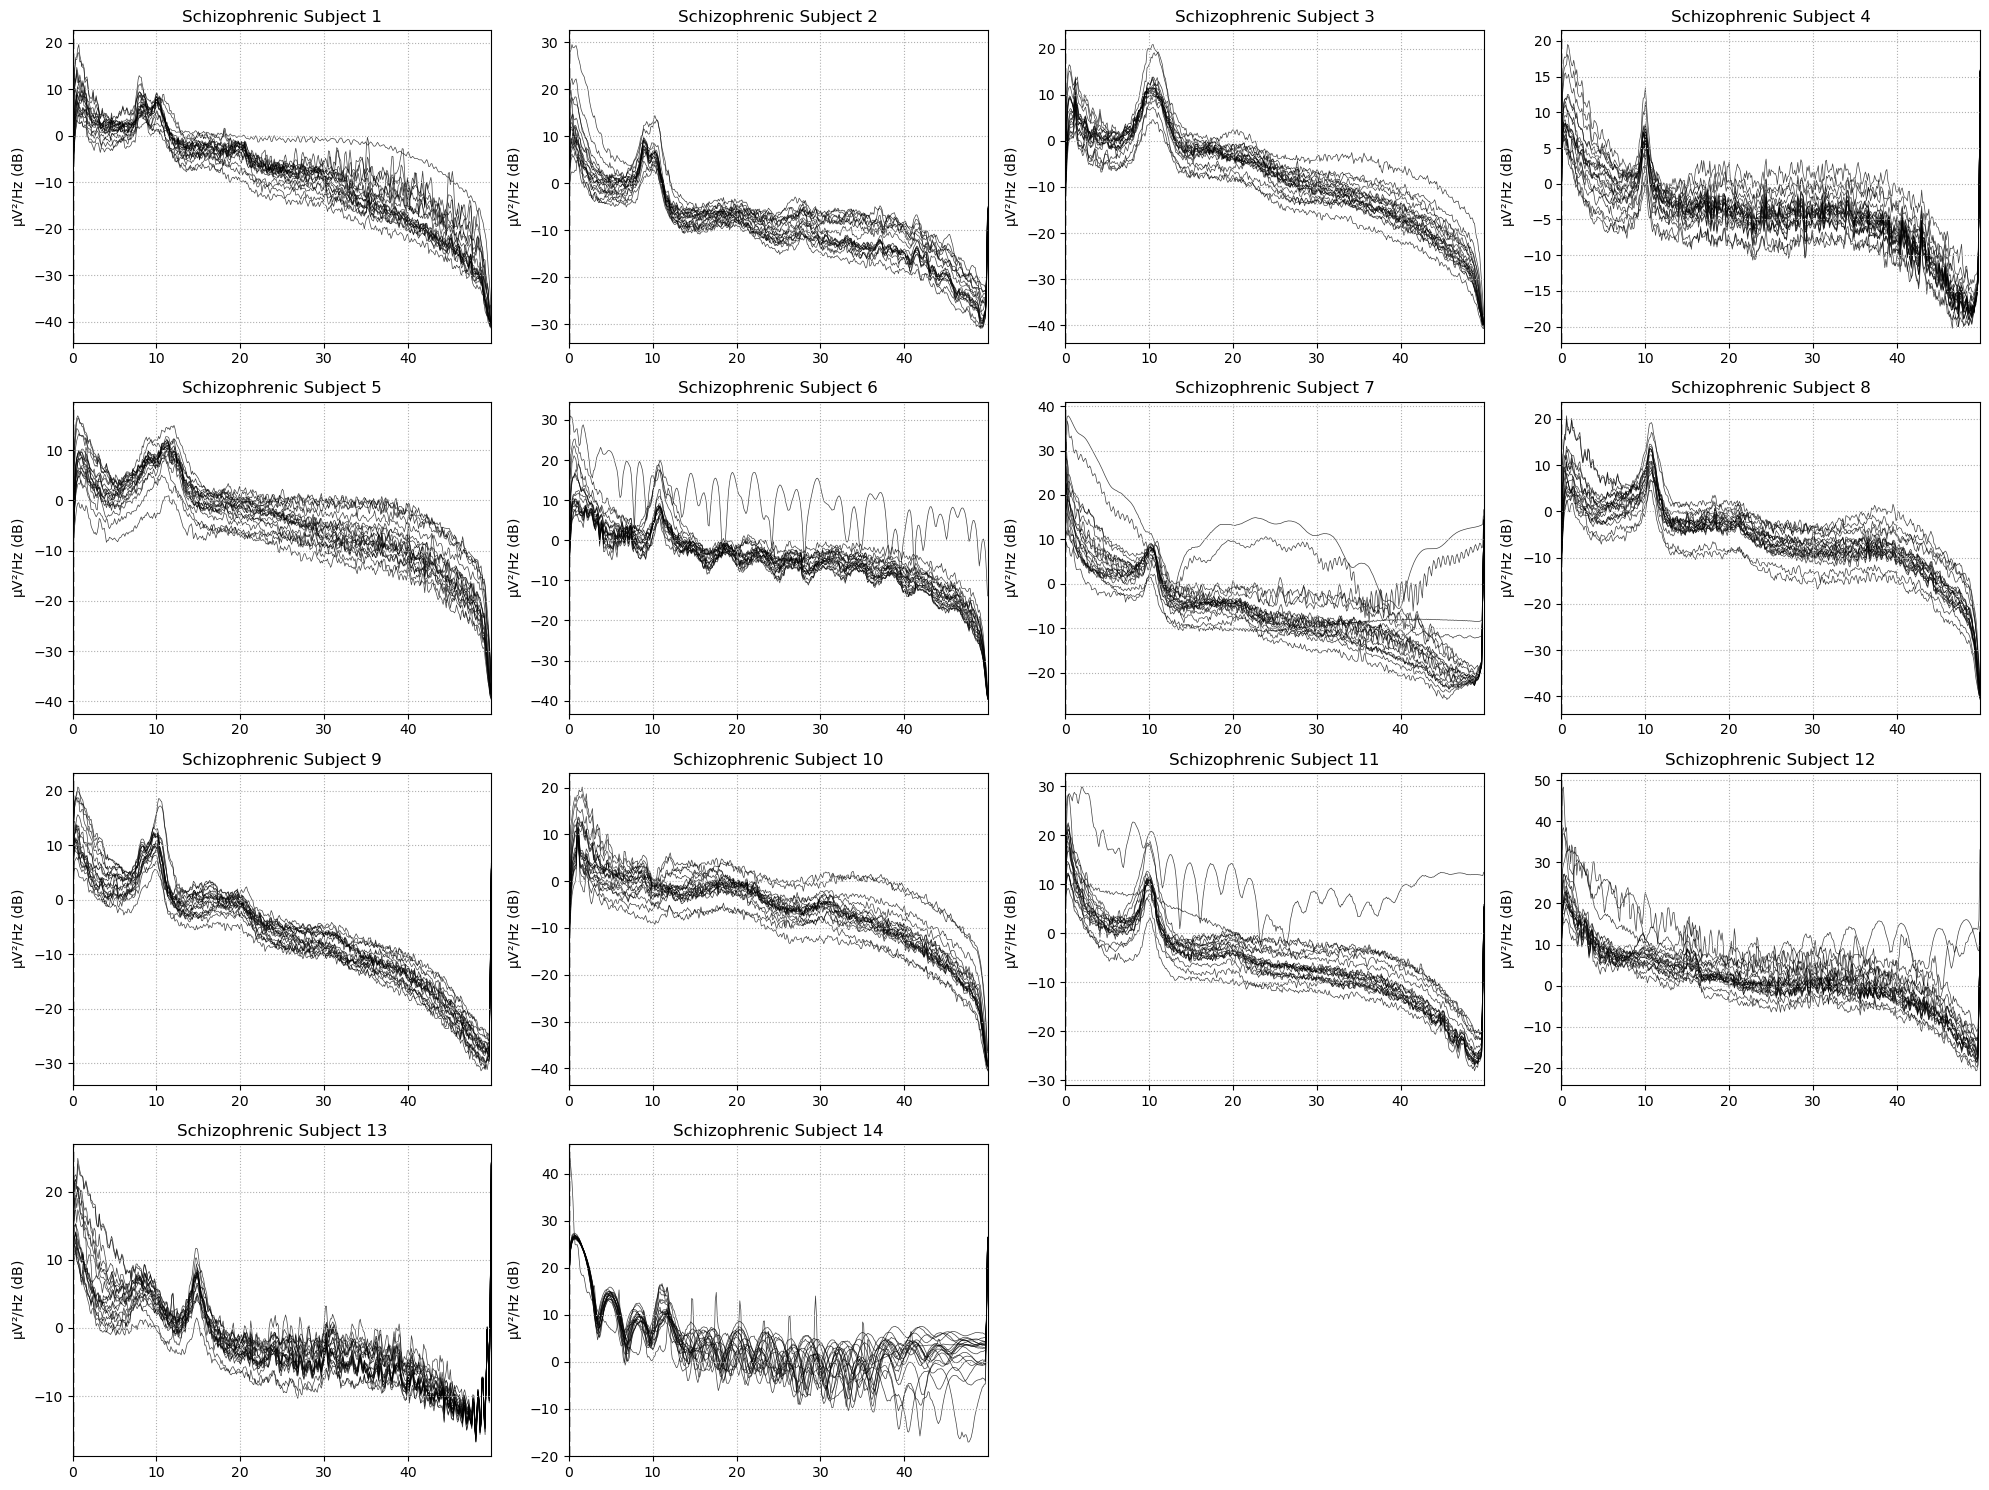

In [45]:
def plot_psd(raw_data, label):
    n_subjects = len(raw_data)
    n_cols = 4 
    n_rows = (n_subjects // n_cols) + (n_subjects %
                                       n_cols > 0) 

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
    axes = axes.flatten()

    for idx, raw in enumerate(raw_data):
        raw.plot_psd(fmax=50, ax=axes[idx], show=False)
        axes[idx].set_title(f'{label} Subject {idx+1}')

    for ax in axes[n_subjects:]:
        ax.axis('off')  

    plt.tight_layout()
    plt.show()

plot_psd(healthy_eeg_data, "Healthy")
plot_psd(schizophrenic_eeg_data, "Schizophrenic")

In [46]:
freq_bands = {
    'Delta': (0.5, 4),
    'Theta': (4, 8),
    'Alpha': (8, 13),
    'Beta': (13, 30),
    'Gamma': (30, 45)
}

In [47]:

def compute_band_power(raw_data, freq_bands):
    band_power = {band: [] for band in freq_bands}
    for raw in raw_data:
        spec = raw.compute_psd(method="welch")
        psd,freqs = spec.get_data(return_freqs=True)
        for band, (fmin, fmax) in freq_bands.items():
            idx_band = np.logical_and(freqs >= fmin, freqs <= fmax)
            band_power[band].append(psd[:, idx_band].mean(axis=1))
    return band_power



healthy_band_power = compute_band_power(healthy_eeg_data, freq_bands)
schizophrenic_band_power = compute_band_power(
    schizophrenic_eeg_data, freq_bands)

Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)


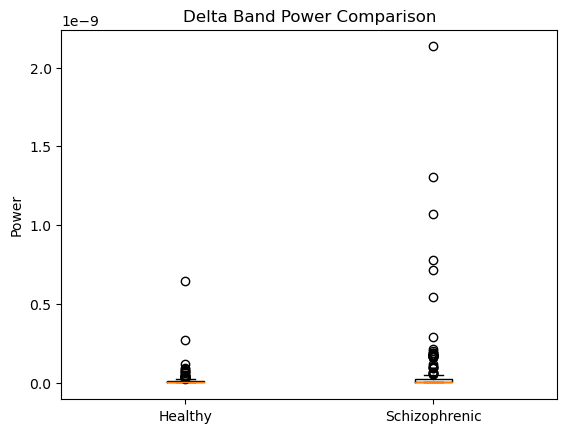

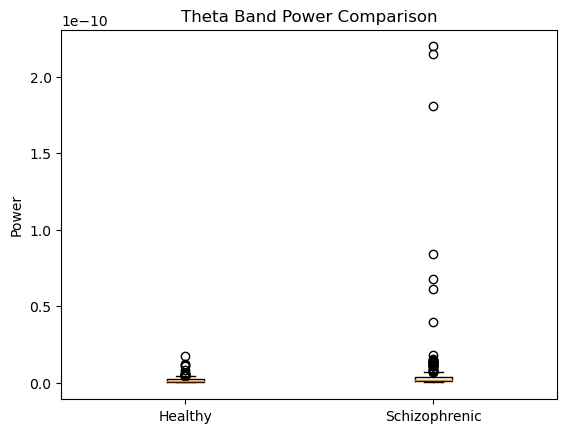

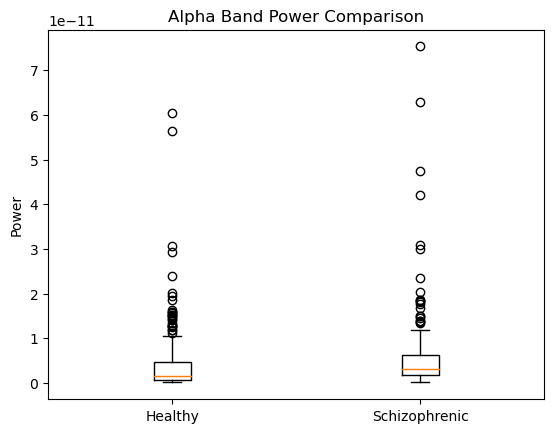

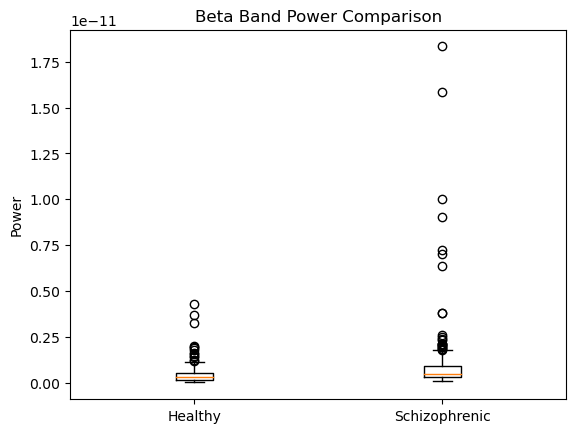

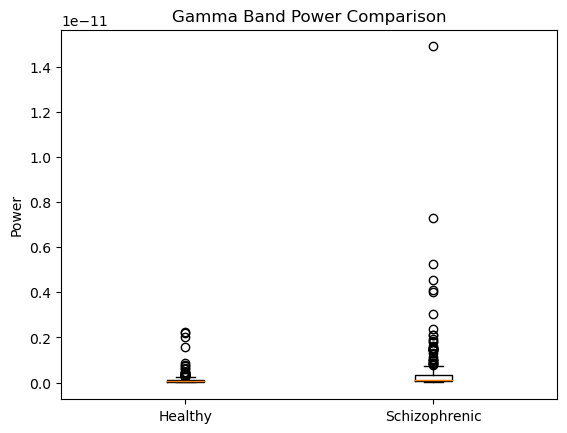

In [48]:
def plot_band_power_comparison(healthy_band_power, schizophrenic_band_power, freq_bands):
    for band in freq_bands:
        plt.figure()
        plt.boxplot([np.concatenate(healthy_band_power[band]), np.concatenate(
            schizophrenic_band_power[band])], labels=['Healthy', 'Schizophrenic'])
        plt.title(f'{band} Band Power Comparison')
        plt.ylabel('Power')
        plt.show()


plot_band_power_comparison(
    healthy_band_power, schizophrenic_band_power, freq_bands)

In [49]:
def compute_correlation_matrices(raw_data):
    correlation_matrices = []
    for raw in raw_data:
        data = raw.get_data()
        correlation_matrix = np.corrcoef(data)
        correlation_matrices.append(correlation_matrix)
    return correlation_matrices



healthy_correlation_matrices = compute_correlation_matrices(healthy_eeg_data)
schizophrenic_correlation_matrices = compute_correlation_matrices(
    schizophrenic_eeg_data)

In [50]:
def average_correlation_matrix(correlation_matrices):
    return np.mean(correlation_matrices, axis=0)


average_healthy_corr = average_correlation_matrix(healthy_correlation_matrices)
average_schizo_corr = average_correlation_matrix(
    schizophrenic_correlation_matrices)

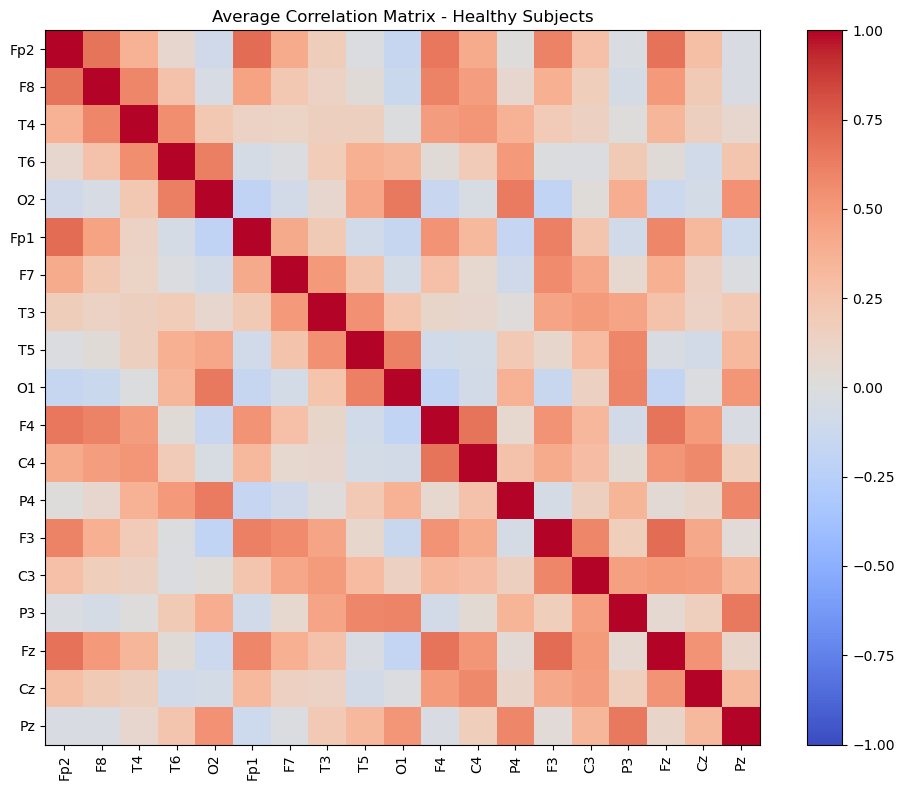

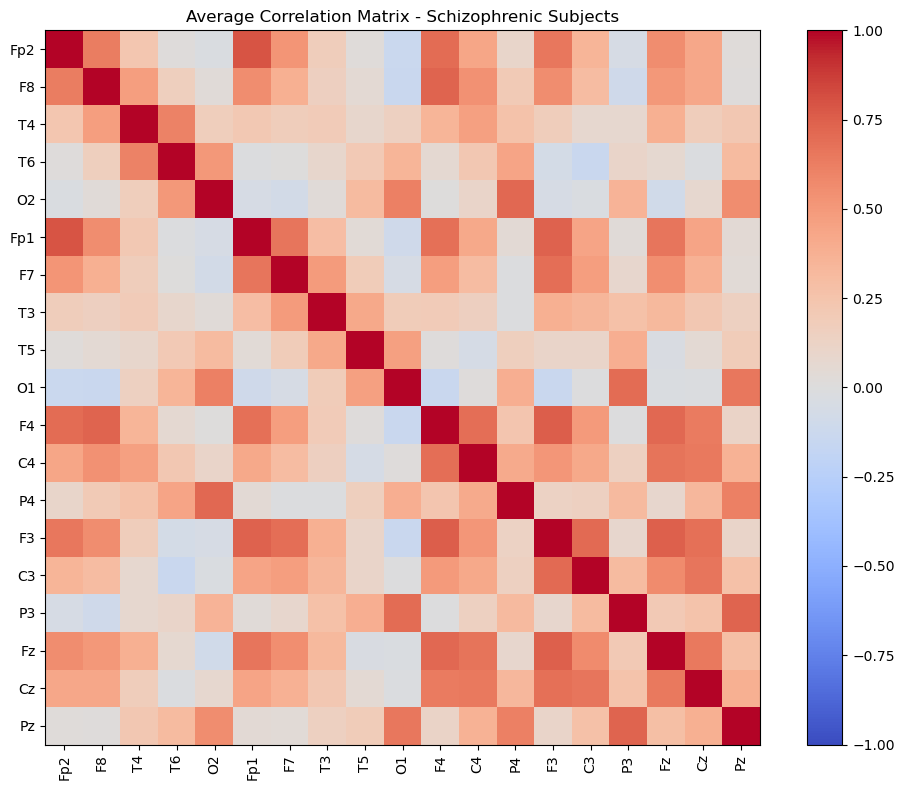

In [51]:
def plot_correlation_matrix(corr_matrix, title, channel_names):
    plt.figure(figsize=(10, 8))
    plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar()
    plt.title(title)
    plt.xticks(ticks=np.arange(len(channel_names)),
               labels=channel_names, rotation=90)
    plt.yticks(ticks=np.arange(len(channel_names)), labels=channel_names)
    plt.tight_layout()
    plt.show()


channel_names = healthy_eeg_data[0].info['ch_names']

plot_correlation_matrix(
    average_healthy_corr, 'Average Correlation Matrix - Healthy Subjects', channel_names)
plot_correlation_matrix(
    average_schizo_corr, 'Average Correlation Matrix - Schizophrenic Subjects', channel_names)

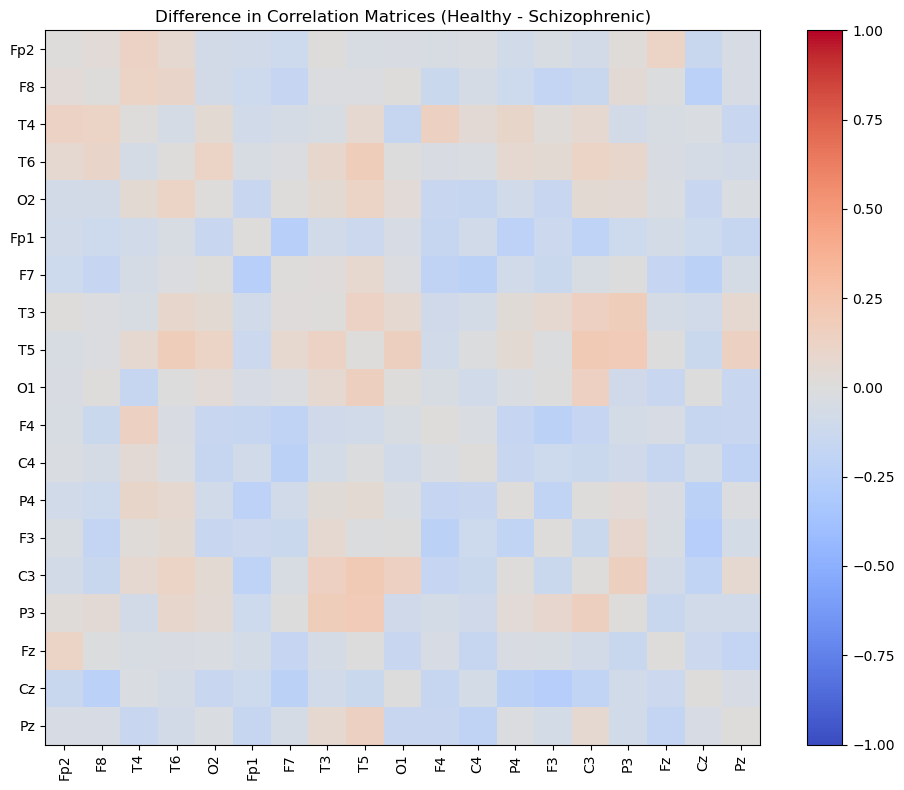

In [52]:
correlation_difference = average_healthy_corr - average_schizo_corr

plot_correlation_matrix(correlation_difference,
                        'Difference in Correlation Matrices (Healthy - Schizophrenic)', channel_names)

In [53]:
significant_regions = np.unravel_index(np.argsort(
    np.abs(correlation_difference), axis=None)[-10:], correlation_difference.shape)

In [54]:
print("Regions with the most significant differences in correlation:")
for i, (region1, region2) in enumerate(zip(significant_regions[0], significant_regions[1])):
    print(
        f"{i+1}. Channel {channel_names[region1]} and Channel {channel_names[region2]} - Correlation Difference: {correlation_difference[region1, region2]}")

Regions with the most significant differences in correlation:
1. Channel F4 and Channel F3 - Correlation Difference: -0.22338987081929806
2. Channel F3 and Channel F4 - Correlation Difference: -0.22338987081929806
3. Channel P4 and Channel Cz - Correlation Difference: -0.2256231224945604
4. Channel Cz and Channel P4 - Correlation Difference: -0.2256231224945604
5. Channel F8 and Channel Cz - Correlation Difference: -0.22767579251123213
6. Channel Cz and Channel F8 - Correlation Difference: -0.22767579251123213
7. Channel F7 and Channel Fp1 - Correlation Difference: -0.25152896625028426
8. Channel Fp1 and Channel F7 - Correlation Difference: -0.25152896625028426
9. Channel F3 and Channel Cz - Correlation Difference: -0.261881086202365
10. Channel Cz and Channel F3 - Correlation Difference: -0.261881086202365


In [55]:
montage = mne.channels.make_standard_montage('standard_1020')
positions = np.array([montage.dig[i]['r'][:2] for i in range(
    len(montage.dig)) if montage.dig[i]['kind'] == 2])
ch_names = [montage.ch_names[i] for i in range(
    len(montage.ch_names)) if montage.dig[i + 3]['kind'] == 2]

In [56]:
print(len(channel_names))

19


In [57]:
picks = [channel_names.index(ch)
         for ch in channel_names if ch in montage.ch_names]
pos = np.array([montage.get_positions()['ch_pos'][ch][:2]
               for ch in channel_names if ch in montage.ch_names])

In [58]:
def plot_topomap(corr_diff, ch_names, pos, title):
    fig, ax = plt.subplots(1,1,figsize=(10, 7))
    mne.viz.plot_topomap(corr_diff, pos, names=ch_names,
                        axes=ax, cmap='coolwarm', show=False)
    ax.set_title(title)
    plt.show()

In [59]:
index1 = channel_names.index('F3')
index2 = channel_names.index('Cz')
diff = correlation_difference[index1, index2]

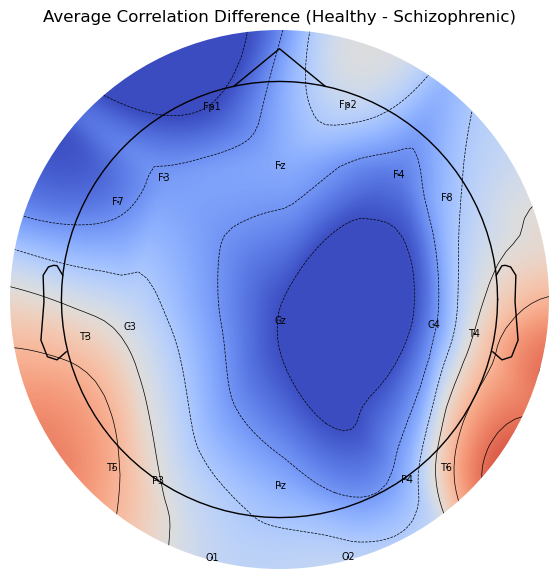

In [60]:
avg_corr_diff_per_channel = np.mean(correlation_difference, axis=1)

plot_topomap(avg_corr_diff_per_channel, channel_names, pos,
             'Average Correlation Difference (Healthy - Schizophrenic)')

https://www.learningeeg.com/montages-and-technical-components

In [61]:
channel_to_region = {
    'Fp1': 'Left Prefrontal', 'Fp2': 'Right Prefrontal',
    'F7': 'Left Frontal', 'F8': 'Right Frontal', 'F3': 'Left Frontal', 'F4': 'Right Frontal',
    'Fz': 'Frontal Midline', 'FC5': 'Left Fronto-Central', 'FC6': 'Right Fronto-Central',
    'FC1': 'Left Fronto-Central', 'FC2': 'Right Fronto-Central',
    'T7': 'Left Temporal', 'T8': 'Right Temporal', 'C3': 'Left Central', 'C4': 'Right Central',
    'Cz': 'Central Midline', 'CP5': 'Left Centro-Parietal', 'CP6': 'Right Centro-Parietal',
    'CP1': 'Left Centro-Parietal', 'CP2': 'Right Centro-Parietal',
    'P7': 'Left Parietal', 'P8': 'Right Parietal', 'P3': 'Left Parietal', 'P4': 'Right Parietal',
    'Pz': 'Parietal Midline', 'O1': 'Left Occipital', 'O2': 'Right Occipital'
}   

channel_names = healthy_eeg_data[0].info['ch_names']
region_names = [channel_to_region.get(ch, ch) for ch in channel_names]

In [62]:
montage = mne.channels.make_standard_montage('standard_1020')
pos = np.array([montage.get_positions()['ch_pos'][ch][:2]
               for ch in channel_names if ch in montage.ch_names])

In [63]:
healthy_correlation_matrices = compute_correlation_matrices(healthy_eeg_data)
schizophrenic_correlation_matrices = compute_correlation_matrices(
    schizophrenic_eeg_data)
average_healthy_corr = average_correlation_matrix(healthy_correlation_matrices)
average_schizo_corr = average_correlation_matrix(
    schizophrenic_correlation_matrices)
correlation_difference =  average_schizo_corr - average_healthy_corr
avg_corr_diff_per_channel = np.mean(correlation_difference, axis=1)

In [64]:
def plot_topomap_with_regions(corr_diff, region_names, pos, title):
    fig, ax = plt.subplots(1,1,figsize=(10, 7))
    mne.viz.plot_topomap(corr_diff, pos, names=region_names,
                        axes=ax, cmap='coolwarm', show=False)
    ax.set_title(title)
    plt.show()

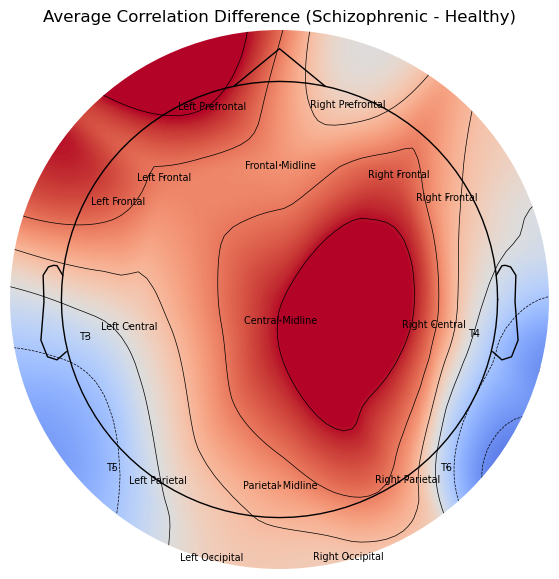

In [65]:
plot_topomap_with_regions(avg_corr_diff_per_channel, region_names,
                          pos, 'Average Correlation Difference (Schizophrenic - Healthy)')

In [66]:
import mne 
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs
from mne.io import concatenate_raws
from mne.datasets import sample

In [67]:
def reorder_channels(raws, reference_channels):
    for i, raw in enumerate(raws):
        raw = raw.reorder_channels(reference_channels)
        raws[i] = raw
    return raws


In [68]:
from Utils.Helper import preprocess_eeg
processed_healthy_eeg_data = []
for file in healthy_files:
    raw = mne.io.read_raw_edf(file, preload=True)
    processed_raw = preprocess_eeg(raw)
    processed_healthy_eeg_data.append(processed_raw)


Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 8251 sampl

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 15 components
Fitting ICA took 3.9s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 15 components
Fitting ICA took 3.4s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 15 components
Fitting ICA took 3.8s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 15 components
Fitting ICA took 2.8s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 236249  =      0.000 ...   944.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 15 components
Fitting ICA took 4.7s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 232499  =      0.000 ...   929.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 15 components
Fitting ICA took 3.7s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 15 components
Fitting ICA took 3.0s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 15 components
Fitting ICA took 2.4s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 226249  =      0.000 ...   904.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 15 components
Fitting ICA took 4.3s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 278749  =      0.000 ...  1114.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 15 components
Fitting ICA took 4.8s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 228749  =      0.000 ...   914.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 15 components
Fitting ICA took 5.3s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 224999  =      0.000 ...   899.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 15 components
Fitting ICA took 3.3s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 241249  =      0.000 ...   964.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 15 components
Fitting ICA took 3.3s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 216249  =      0.000 ...   864.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 15 components
Fitting ICA took 3.1s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components


In [70]:
reference_channels = processed_healthy_eeg_data[0].info['ch_names']
processed_healthy_eeg = reorder_channels(
    processed_healthy_eeg_data, reference_channels)

In [71]:
processed_schizophrenic_eeg = []
for file in schizophrenic_files:
    raw = mne.io.read_raw_edf(file, preload=True)
    processed_raw = preprocess_eeg(raw)
    processed_schizophrenic_eeg.append(processed_raw)
processed_schizophrenic_eeg = reorder_channels(
    processed_schizophrenic_eeg, reference_channels)


Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\s01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 211249  =      0.000 ...   844.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 8251 sampl

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Selecting by number: 15 components
Fitting ICA took 3.3s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\s02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 286249  =      0.000 ...  1144.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Selecting by number: 15 components
Fitting ICA took 7.4s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\s03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 240999  =      0.000 ...   963.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Selecting by number: 15 components
Fitting ICA took 4.4s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\s04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 301249  =      0.000 ...  1204.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Selecting by number: 15 components
Fitting ICA took 7.2s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\s05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 222499  =      0.000 ...   889.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 15 components
Fitting ICA took 6.4s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\s06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 184999  =      0.000 ...   739.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Selecting by number: 15 components
Fitting ICA took 4.8s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\s07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 336499  =      0.000 ...  1345.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 15 components
Fitting ICA took 7.7s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\s08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227749  =      0.000 ...   910.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 15 components
Fitting ICA took 6.8s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\s09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 296249  =      0.000 ...  1184.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Selecting by number: 15 components
Fitting ICA took 6.3s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\s10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 212499  =      0.000 ...   849.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Selecting by number: 15 components
Fitting ICA took 2.9s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\s11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 339999  =      0.000 ...  1359.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 15 components
Fitting ICA took 10.3s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\s12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 271749  =      0.000 ...  1086.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Ham

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 15 components
Fitting ICA took 6.6s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\s13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 283749  =      0.000 ...  1134.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Selecting by number: 15 components
Fitting ICA took 5.7s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\s14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 542499  =      0.000 ...  2169.996 secs...
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamm

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Selecting by number: 15 components
Fitting ICA took 13.9s.
No EOG channels specified, skipping EOG artifact detection.
Skipping ECG artifact detection.
Applying ICA to Raw instance
    Transforming to ICA space (15 components)
    Zeroing out 0 ICA components
    Projecting back using 19 PCA components


In [75]:
def remove_ssp_projectors(raw):
    raw.del_proj()  
    return raw


processed_healthy_eeg = [remove_ssp_projectors(
    raw) for raw in processed_healthy_eeg]
processed_schizophrenic_eeg = [remove_ssp_projectors(
    raw) for raw in processed_schizophrenic_eeg]

processed_healthy_combined = concatenate_raws(processed_healthy_eeg)
processed_schizophrenic_combined = concatenate_raws(
    processed_schizophrenic_eeg)

In [76]:
healthy_epochs = mne.make_fixed_length_epochs(
    processed_healthy_combined, duration=2, overlap=1)
schizophrenic_epochs = mne.make_fixed_length_epochs(
    processed_schizophrenic_combined, duration=2, overlap=1)

Not setting metadata
13029 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
15832 matching events found
No baseline correction applied
0 projection items activated


In [77]:
healthy_epochs.save('processed_healthy_eeg-epo.fif', overwrite=True)
schizophrenic_epochs.save(
    'processed_schizophrenic_eeg-epo.fif', overwrite=True)

Using data from preloaded Raw for 13029 events and 500 original time points ...
13 bad epochs dropped
Using data from preloaded Raw for 1 events and 500 original time points ...
Using data from preloaded Raw for 13016 events and 500 original time points ...
Using data from preloaded Raw for 15832 events and 500 original time points ...
13 bad epochs dropped
Using data from preloaded Raw for 1 events and 500 original time points ...
Using data from preloaded Raw for 15819 events and 500 original time points ...
